In [1]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
</style>

# Metody Numeryczne

## Preliminaria algebry liniowej



### dr hab. inż. Jerzy Baranowski, Prof.AGH

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def normalize_vector(v):
    v=np.array(v)
    return v/np.linalg.norm(v)

## Macierz

$$
A=
\begin{bmatrix}
a_{11}&a_{12}&a_{13}\\
a_{21}&a_{22}&a_{23}\\
a_{31}&a_{32}&a_{33}\\
\end{bmatrix}=
\left[
\begin{array}{c|c|c}
&& \\
a_1 & a_2 & a_3  \\
&&
\end{array}
\right]
$$

## Iloczyn macierz-wektor

$$
Ax = \sum_{j=1}^n x_j a_j
$$


$$
\left[
\begin{array}{c|c|c|c}
&& \\
&& \\
a_1 & a_2 & \dots &a_n  \\
&& \\
&&
\end{array}
\right]
\begin{bmatrix}
x_1\\x_2\\\vdots\\x_n
\end{bmatrix}
=
x_1
\begin{bmatrix}
\\\\a_1\\\\\\
\end{bmatrix}
+x_2
\begin{bmatrix}
\\\\a_1\\\\\\
\end{bmatrix}
+\dots+
x_n
\begin{bmatrix}
\\\\a_n\\\\\\
\end{bmatrix}
$$

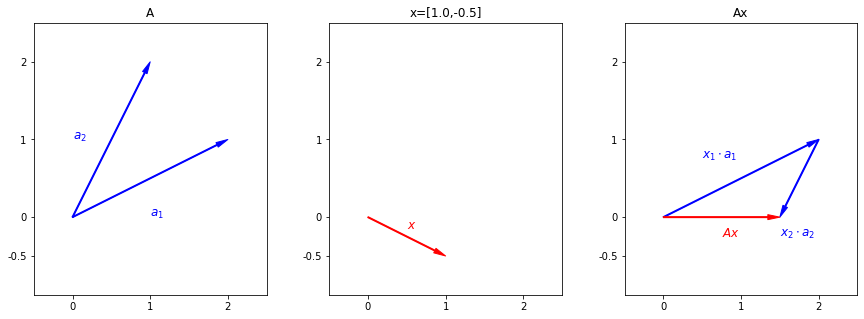

In [3]:
A=np.array([[2,1],[1,2]])
a1=tuple(A[:,0])
a2=tuple(A[:,1])
fig,axes=plt.subplots(1,3,figsize=(15,5))
ax1=axes[0]
ax1.set_xlim([-.5,2.5])
ax1.set_ylim([-1,2.5])
ax1.set_aspect('equal')
ax1.annotate('',xytext=(0,0),xy=a1,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax1.annotate('',xytext=(0,0),xy=a2,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax1.text(1,0,'$a_1$',c='blue',fontsize=12)
ax1.text(0,1,'$a_2$',c='blue',fontsize=12)
ax1.set_title('A',fontsize=12)
ax1.set_xticks([0,1,2])
ax1.set_yticks([-.5,0,1,2])
ax1.set_yticklabels(['-0.5','0','1','2'])

ax15=axes[1]
x=np.array([[1.],[-.5]])
ax15.set_xlim([-.5,2.5])
ax15.set_ylim([-1,2.5])
ax15.set_aspect('equal')
ax15.annotate('',xytext=(0,0),xy=tuple(x),arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='red'))
ax15.text(0.5,-0.15,'$x$',c='red',fontsize=12)
ax15.set_title('x=[{first},{last}]'.format(first=x[0,0],last=x[1,0]),fontsize=12)
ax15.set_xticks([0,1,2])
ax15.set_yticks([-.5,0,1,2])
ax15.set_yticklabels(['-0.5','0','1','2'])


ax2=axes[2]
ax2.set_xlim([-.5,2.5])
ax2.set_ylim([-1,2.5])
ax2.set_aspect('equal')
ax2.annotate('',xytext=(0,0),xy=a1,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.annotate('',xytext=a1,xy=tuple(A[:,0]-.5*A[:,1]),arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.annotate('',xytext=(0,0),xy=tuple(A@x),arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='red'))
ax2.text(0.5,.75,'$x_1\cdot a_1$',c='blue',fontsize=12)
ax2.text(1.5,-0.25,'$x_2\cdot a_2$',c='blue',fontsize=12)
ax2.text(0.75,-0.25,'$A x$',c='red',fontsize=12)
ax2.set_title('Ax',fontsize=12)
ax2.set_xticks([0,1,2])
ax2.set_yticks([-.5,0,1,2])
ax2.set_yticklabels(['-0.5','0','1','2'])
plt.ioff()

## Przykład

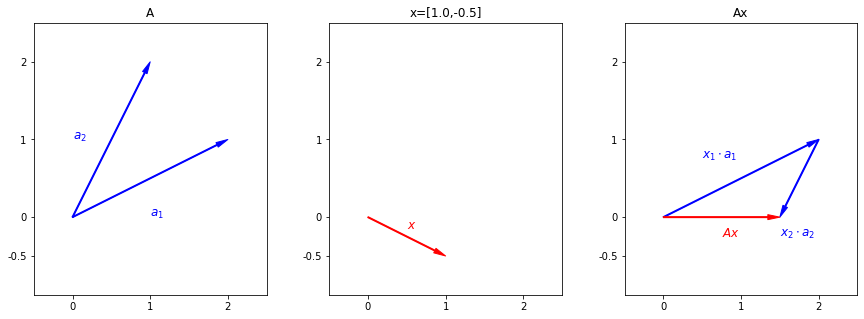

In [4]:
fig

## Rząd macierzy 

Rzędem macierzy nazywamy liczbę liniowo niezależnych kolumn.

Macierz $m \times n$ ma *pełny rząd* jeżeli ma maksymalny możliwy rząd. To znaczy, że dla $m\geq n$ jest ona rzędu $n$

## Macierz odwrotna
- Macierz kwadratowa $A$ o wymiarach $m \times m$
- Macierz odwrotna do $A$ to taka macierz $Z$, że 
$$ A\cdot Z = I$$
- Macierz odwrotną oznaczamy $A^{-1}$
- Zachodzi $A^{-1}\cdot A= A\cdot A^{-1}=I$
- Macierz odwrotna istnieje wtedy i tylko wtedy gdy rząd macierzy jest równy $n$

## Macierz Sprzężona (Transponowana)

Macierz, w której elementy zamieniamy na sprzężone, a kolumny zamieniamy na wiersze
$$
A=\begin{bmatrix}a_{11}&a_{12}\\a_{21}&a_{22}\\a_{31}&a_{32}\end{bmatrix}
\Rightarrow
A^*=\begin{bmatrix}\bar{a}_{11}&\bar{a}_{21}&\bar{a}_{31}\\
\bar{a}_{12}&\bar{a}_{22}&\bar{a}_{32}
\end{bmatrix}
$$
- Jeżeli macierz $A$ jest rzeczywista, to sprzężenie jest transpozycją, oznaczaną $A^\mathsf{T}$

## Iloczyn skalarny 


Iloczyn skalarny wektorów

$$ x^*y=\sum_{i=1}^m\bar{x}_i y_i$$

Długość wektora
$$\Vert x\Vert = \sqrt{x^*x}=\left(\sum_{i=1}^m\vert x\vert^2\right)^{1/2}$$

Kąt między wektorami 
$$
\cos\theta=\frac{x^*y}{\Vert x\Vert\Vert y\Vert}
$$

## Wektory ortogonalne
- Dwa wektory nazywamy ortogonalnymi, jeżeli iloczyn skalarny między nimi jest równy 0
- Zbiór $S$ wektorów, jest ortogonalny, jeżeli wektory są parami ortogonalne, tj.
$$
x,y\in S,\ x\neq y\Rightarrow x^*y=0
$$
- Wektory ortogonalne są liniowo niezależne
- Wektory ortogonalne o długości 1 nazywamy ortonormalnymi

## Macierz Unitarna (Ortogonalna)
-Macierz kwadratowa $m\times m$ jest unitarna (ortogonalna), jeżeli jej sprzężenie (transpozycja) jest jej odwrotnością
$$
Q^* = Q^{-1} \iff Q^* Q=I
$$

-Kolumny macierzy unitarnej tworzą zbiór wektorów ortonormalnych

$$
\left[
\begin{array}{ccccc}
&&q_1^*&& \\ \hline
&&q_2^*&& \\ \hline
&&\vdots&& \\ \hline
&&q_m^*&& \\ 
\end{array}\right]
\left[
\begin{array}{c|c|c|c}
&&& \\
q_1 & q_2 &\dots& q_m  \\
&&&
\end{array}
\right]
=\begin{bmatrix}
1&&&\\
&1&&\\
&&\ddots&\\
&&&1
\end{bmatrix}
$$


# Metody Numeryczne

## Normy wektorów i macierzy



### dr hab. inż. Jerzy Baranowski, Prof.AGH

## Normy
- Norma wektora to funkcja, która każdemu wektorowi przyporządkowuje liczbę nieujemną
$$ \Vert \cdot \Vert : X \rightarrow [0, \infty)$$
- Norma jest pewnym uogólnieniem długości wektora

## Aksjomaty normy
- Norma równa $0$ oznacza, że wektor jest wektorem zerowym
$$ 
\Vert x\Vert =0 \Rightarrow x=0
$$
- Skalowanie wektora skaluje normę
$$ 
\Vert \alpha x\Vert =|\alpha|\Vert x\Vert
$$
- Nierówność trójkąta
$$
\Vert x+y\Vert\leq \Vert x\Vert+\Vert y\Vert
$$

## Norma jako odległość 

Odległość między dwoma punktami w danej normie to norma wektora jaki poprowadzono między nimi innymi słowy norma różnicy jest metryką.

## Norma w definicji zbiorów
-  Przy użyciu normy łatwo zdefiniować zbiory, zwłaszcza w ogólniejszej formie, np.

    – Kula
$$K(x_0, r) = \{x: \Vert x - x_0\Vert \leq r\}$$
    – Sfera
$$S(x_0, r) = \{x: \Vert x - x_0\Vert = r\}$$


## Kula nie musi być okrągła 

Rozważmy normy
- $l_1$
 $$ \Vert x\Vert_1= |x_1|+|x_2|+\ldots+|x_n|$$
- Euklidesową ($l_2$)
 $$ \Vert x\Vert_2= \sqrt{|x_1|^2+|x_2|^2+\ldots+|x_n|^2}$$
- Maksimum
  $$ \Vert x\Vert_\infty= \max_i|x_i|$$
- ogólnie $l_p$
 $$ \Vert x\Vert_p= \left(\sum_{i=1}^n |x_i|^p\right)^{1/p}$$


In [5]:
lp_norm = lambda x,p: np.sum(np.abs(x)**p)**(1/p)
l1_norm = lambda x: lp_norm(x,1)
l2_norm=lambda x: lp_norm(x,2)
linf_norm= lambda x: np.max(np.abs(x))


Text(0.5, 1.0, '$\\Vert x\\Vert_1=1$')

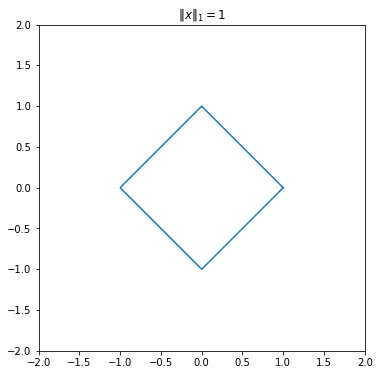

In [6]:

## parametryczny zbiór punktów
t=np.linspace(0,2*np.pi,1000)
x=np.array([np.cos(t),np.sin(t)])
fig,ax=plt.subplots(1,1,figsize=(7,6))
l1_ball=x/np.apply_along_axis(l1_norm,0,x)
plt.plot(l1_ball[0,:],l1_ball[1,:])
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect('equal')
ax.set_title('$\Vert x\Vert_1=1$')


## Kula w $l_1$

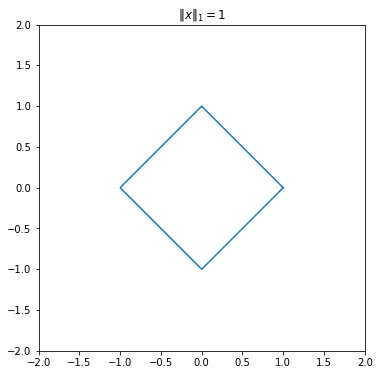

In [7]:
fig

Text(0.5, 1.0, '$\\Vert x\\Vert_2=1$')

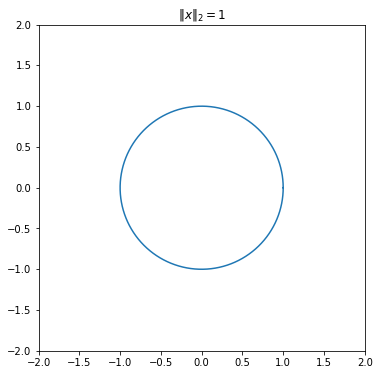

In [8]:
k=2

lk_norm=lambda x: lp_norm(x,k)
fig,ax=plt.subplots(1,1,figsize=(7,6))
lk_ball=x/np.apply_along_axis(lk_norm,0,x)
plt.plot(lk_ball[0,:],lk_ball[1,:])
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect('equal')
ax.set_title('$\Vert x\Vert_{}=1$'.format(k))

## Kula w normie Euklidesowej

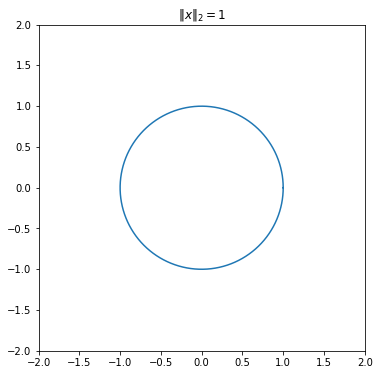

In [9]:
fig

Text(0.5, 1.0, '$\\Vert x\\Vert_\\infty=1$')

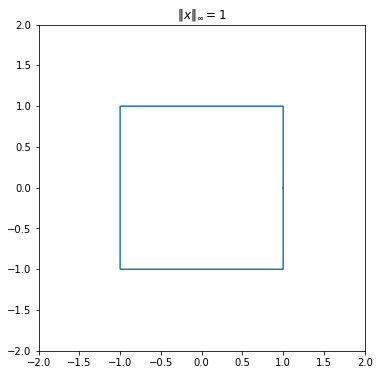

In [10]:
fig,ax=plt.subplots(1,1,figsize=(7,6))
linf_ball=x/np.apply_along_axis(linf_norm,0,x)
plt.plot(linf_ball[0,:],linf_ball[1,:])
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect('equal')
ax.set_title('$\Vert x\Vert_\infty=1$')

## Kula w normie maksimum

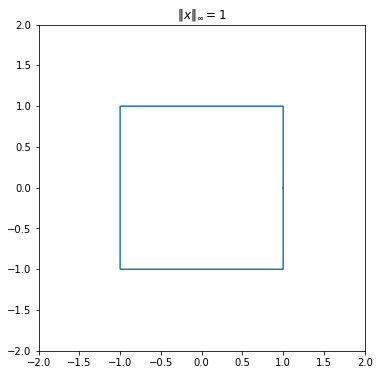

In [11]:
fig

## Płynna ewolucja kształtu

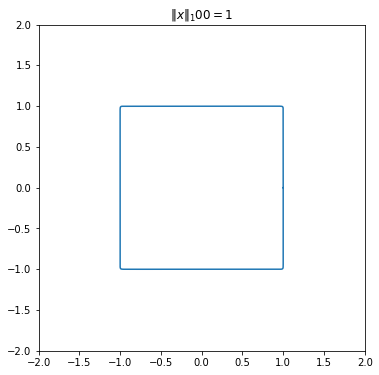

In [12]:
k=100

lk_norm=lambda x: lp_norm(x,k)
fig,ax=plt.subplots(1,1,figsize=(7,6))
lk_ball=x/np.apply_along_axis(lk_norm,0,x)
ax.plot(lk_ball[0,:],lk_ball[1,:])
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect('equal')
ax.set_title('$\Vert x\Vert_{}=1$'.format(k))
plt.show()

## Norma macierzy
Istnieją dwa rodzaje norm macierzowych 

– indukowana

– elementowa (ogólna)

## Norma indukowana
To taka norma, która mówi nam jak silnie dana macierz wpływa na wektor

$$
\begin{aligned}
\Vert A\Vert ={}&\max\{\Vert A x\Vert\colon x\in R^n\ \mathrm{gdzie}\ \Vert x\Vert=1\}\\
={}&\max\left\{\frac{\Vert A x\Vert}{\Vert x\Vert}\colon x\in R^n\ \mathrm{gdzie}\ x\neq0 \right\}
\end{aligned}
$$

## Przykład

Zobrazujemy działanie normy indukowanej na przykładzie macierzy
$$
A=\begin{bmatrix}
1&2\\0&2
\end{bmatrix}
$$

Text(-2, 2, '$\\Vert A\\Vert_1 =4$')

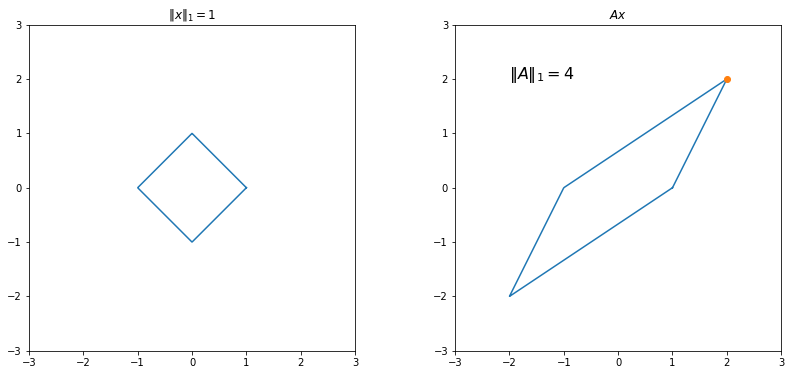

In [13]:
A=np.array([[1,2],[0,2]])
Al1=A@l1_ball
fig,axes=plt.subplots(1,2,figsize=(14,6))
ax1=axes[0]
ax1.plot(l1_ball[0,:],l1_ball[1,:])
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_aspect('equal')
ax1.set_title('$\Vert x\Vert_1=1$')
ax2=axes[1]
ax2.plot(Al1[0,:],Al1[1,:])
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_aspect('equal')
ax2.set_title('$Ax$')
ax2.plot(2,2,linestyle='none',marker='o')
ax2.text(-2,2,r'$\Vert A\Vert_1 =4$',fontsize=16)

## Norma $l_1$

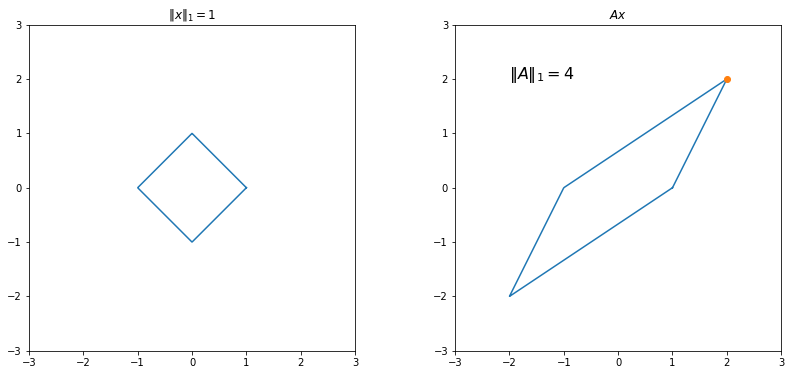

In [14]:
fig

## Norma Euklidesowa

Text(-2, 2, '$\\Vert A\\Vert_2 \\approx 2.9208$')

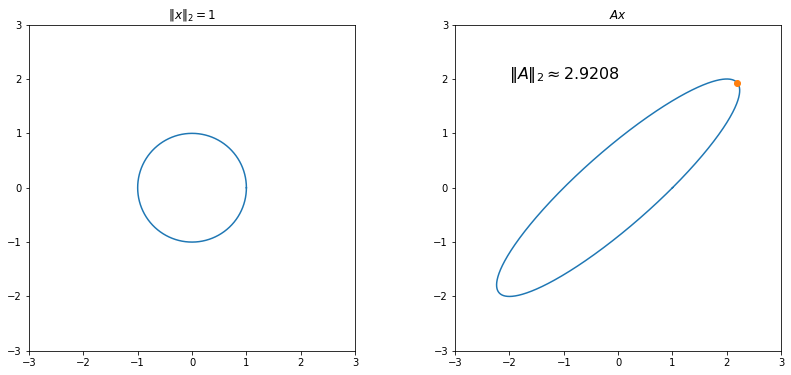

In [15]:
P,S,QT=np.linalg.svd(A)
l2_norm=lambda x: lp_norm(x,2)
l2_ball=x/np.apply_along_axis(l2_norm,0,x)
Al2=A@l2_ball
fig,axes=plt.subplots(1,2,figsize=(14,6))
ax1=axes[0]
ax1.plot(l2_ball[0,:],l2_ball[1,:])
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_aspect('equal')
ax1.set_title('$\Vert x\Vert_2=1$')
ax2=axes[1]
ax2.plot(Al2[0,:],Al2[1,:])
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_aspect('equal')
ax2.set_title('$Ax$')
w=(P@np.diag(S))[:,0]
ax2.plot(w[0],w[1],linestyle='none',marker='o')
ax2.text(-2,2,r'$\Vert A\Vert_2 \approx {:1.4f}$'.format(S[0]),fontsize=16)

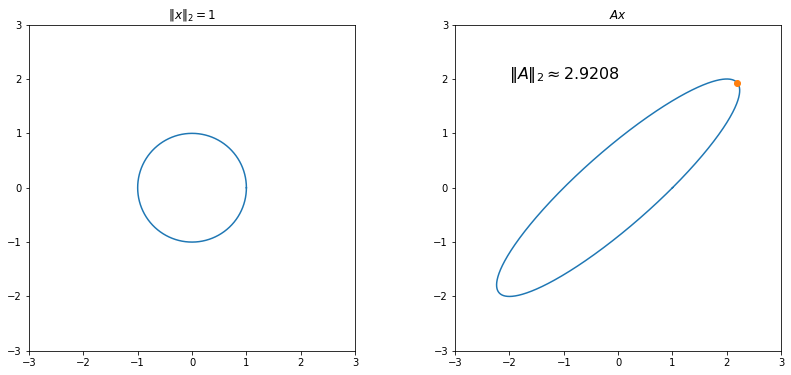

In [16]:
fig

## Norma maksimum

Text(-2, 2, '$\\Vert A\\Vert_1 =3$')

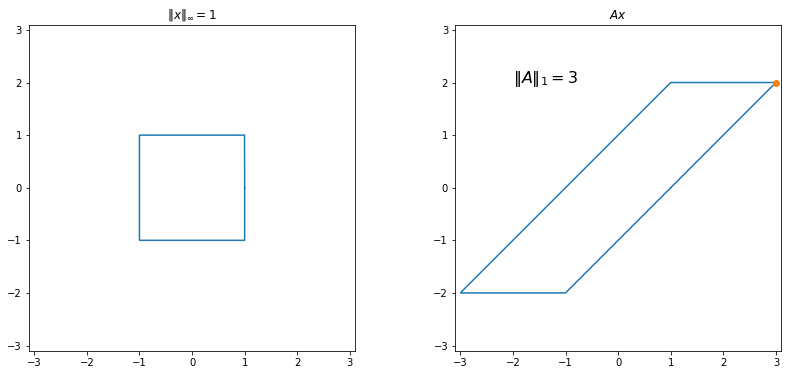

In [17]:
Alinf=A@linf_ball
fig,axes=plt.subplots(1,2,figsize=(14,6))
ax1=axes[0]
ax1.plot(linf_ball[0,:],linf_ball[1,:])
ax1.set_xlim([-3.1,3.1])
ax1.set_ylim([-3.1,3.1])
ax1.set_aspect('equal')
ax1.set_title('$\Vert x\Vert_\infty=1$')
ax2=axes[1]
ax2.plot(Alinf[0,:],Alinf[1,:])
ax2.set_xlim([-3.1,3.1])
ax2.set_ylim([-3.1,3.1])
ax2.set_aspect('equal')
ax2.set_title('$Ax$')
ax2.plot(3,2,linestyle='none',marker='o')
ax2.text(-2,2,r'$\Vert A\Vert_1 =3$',fontsize=16)

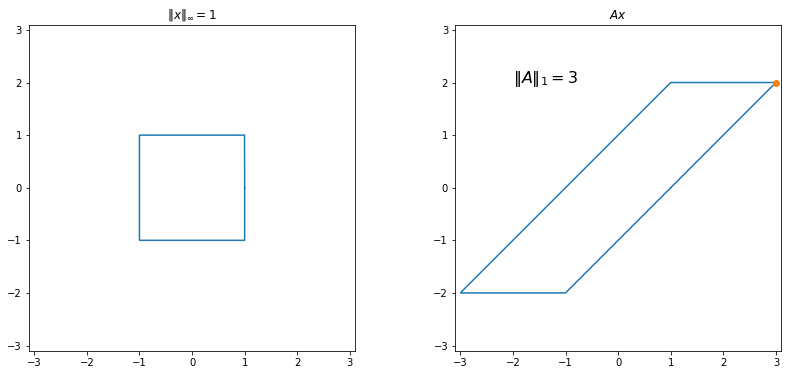

In [18]:
fig

Można podać wzory na niektóre normy indukowane:

$$\Vert A\Vert_1=\max_{1\leq j\leq n}\sum_{i=1}^m|a_{ij}|$$

$$\Vert A\Vert_\infty=\max_{1\leq i\leq m}\sum_{j=1}^n|a_{ij}|$$

## Normy elementowe (ogólne)

To normy, które definiowane są wprost w oparciu o parametry macierzy. Najbardziej znana norma Frobeniusa

$$
\Vert A\Vert_F=\sqrt{\sum_{i=1}^m\sum_{j=1}^n|a_{ij}|^2}=\sqrt{\mathrm{trace}(A^*A)}
$$


## Równoważność norm
Wszystkie normy w przestrzeniach skończenie wymiarowych są równoważne. Dla dwóch norm $\Vert \cdot\Vert_a$ i $\Vert \cdot\Vert_b$ istnieją takie stałe $c,\ C>0$, że dla każdego $x\in R^n$ zachodzi

$$
c \Vert x\Vert_b\leq \Vert x\Vert_a\leq C \Vert x\Vert_b
$$

# Metody Numeryczne

## Rozkład na wartości singularne (SVD)



### dr hab. inż. Jerzy Baranowski, Prof.AGH

## Działanie macierzy na wektor

[[2 1]
 [0 1]]


Text(0.5, 1.0, 'Ax')

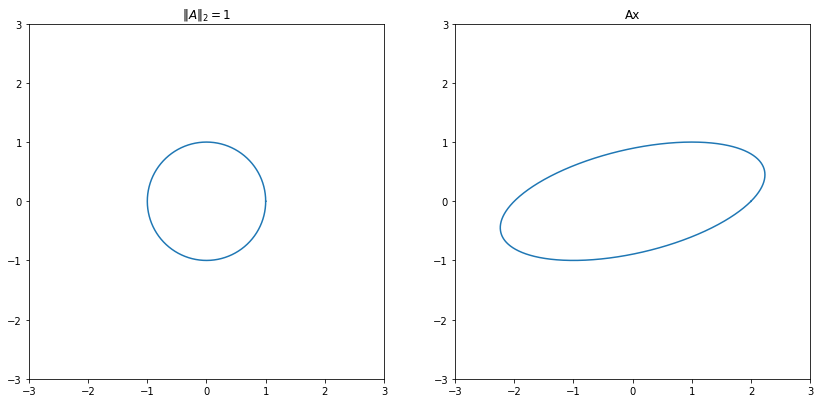

In [19]:
t=np.linspace(0,2*np.pi,1000)
x=np.array([np.cos(t),np.sin(t)])
A=np.array([[2,1],[0,1]])
#A=np.random.randint(0,4,size=(2,2))
print(A)
y=A@x
fig,axes=plt.subplots(1,2,figsize=(14,8))
ax1=axes[0]
ax1.plot(x[0,:],x[1,:])
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_aspect('equal')
ax1.set_title('$\Vert A \Vert_2=1$')
ax2=axes[1]
ax2.plot(y[0,:],y[1,:])
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_aspect('equal')
ax2.set_title('Ax')

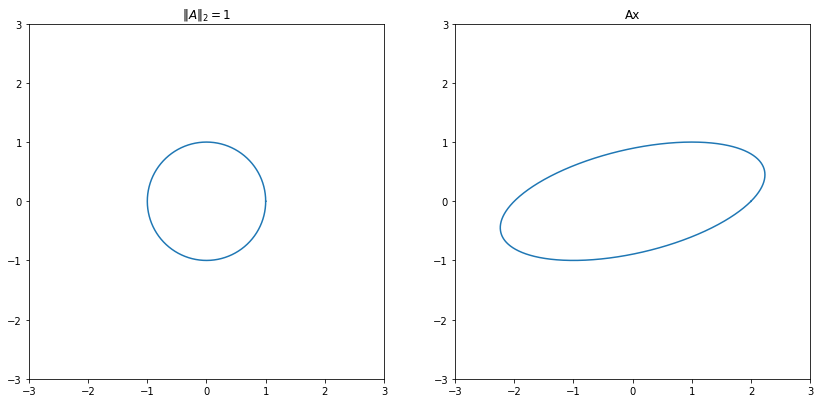

In [20]:
fig

## Kula przekształca się w elipsę

Text(0, 0, '')

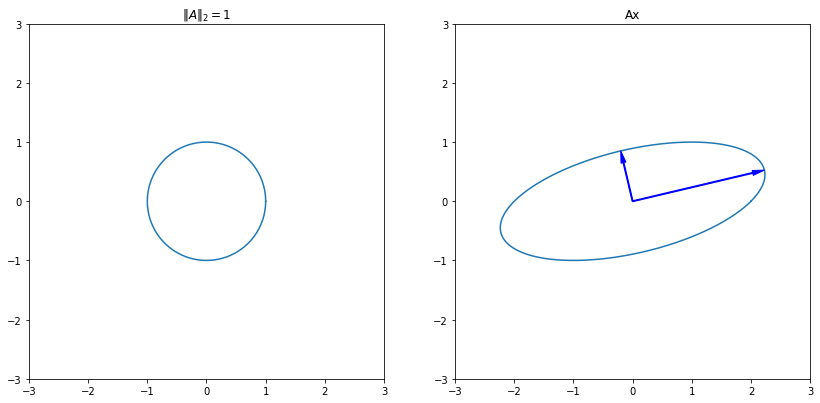

In [21]:
P,S,QT=np.linalg.svd(A)
Q=QT.T

fig,axes=plt.subplots(1,2,figsize=(14,8))
ax1=axes[0]
ax1.plot(x[0,:],x[1,:])
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_aspect('equal')
ax1.set_title('$\Vert A \Vert_2=1$')


ax2=axes[1]
ax2.plot(y[0,:],y[1,:])
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_aspect('equal')
ax2.set_title('Ax')
ax2.annotate('',xytext=(0,0),xy=(S[0]*P[0,0],S[0]*P[1,0]),arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.annotate('',xytext=(0,0),xy=(S[1]*P[0,1],S[1]*P[1,1]),arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))

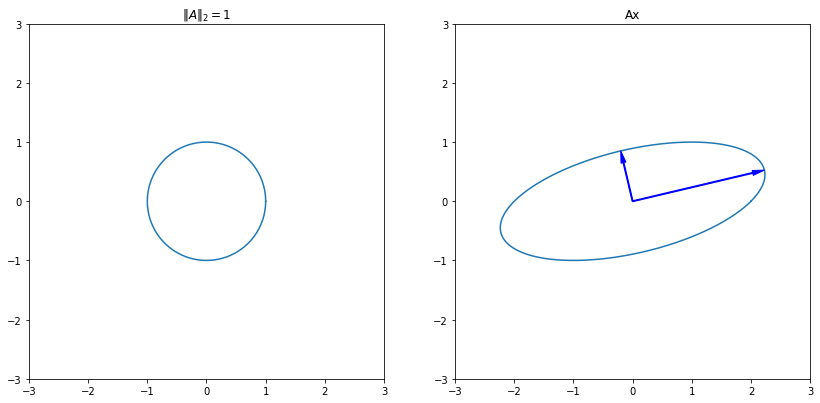

In [22]:
fig

## Półosie elipsy

Text(-0.5, 0.3402603233408159, '$\\sigma_2$')

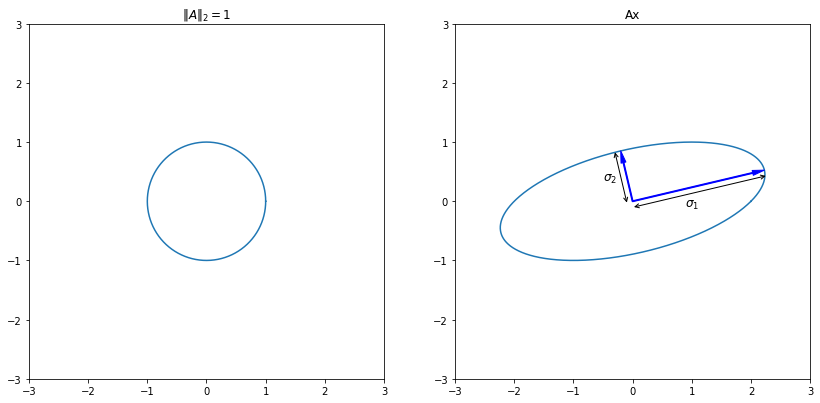

In [23]:
fig,axes=plt.subplots(1,2,figsize=(14,8))
ax1=axes[0]
ax1.plot(x[0,:],x[1,:])
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_aspect('equal')
ax1.set_title('$\Vert A \Vert_2=1$')

ax2=axes[1]
ax2.plot(y[0,:],y[1,:])
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_aspect('equal')
p1s1=(S[0]*P[0,0],S[0]*P[1,0])
p2s2=(S[1]*P[0,1],S[1]*P[1,1])
ax2.annotate('',xytext=(0,0),xy=p1s1,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.annotate('',xytext=tuple(np.array([0,0])-normalize_vector(p2s2)*0.1),xy=tuple(np.array(p1s1)-normalize_vector(p2s2)*0.1),arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0,color='black'))
ax2.text(p1s1[0]*0.4,-0.1,'$\sigma_1$',c='black',fontsize=12)
ax2.set_title('Ax')

ax2.annotate('',xytext=(0,0),xy=p2s2,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.annotate('',xytext=tuple(np.array([0,0])-normalize_vector(p1s1)*0.1),xy=tuple(np.array(p2s2)-normalize_vector(p1s1)*0.1),arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0,color='black'))
ax2.text(-0.5,p2s2[1]*0.4,'$\sigma_2$',c='black',fontsize=12)

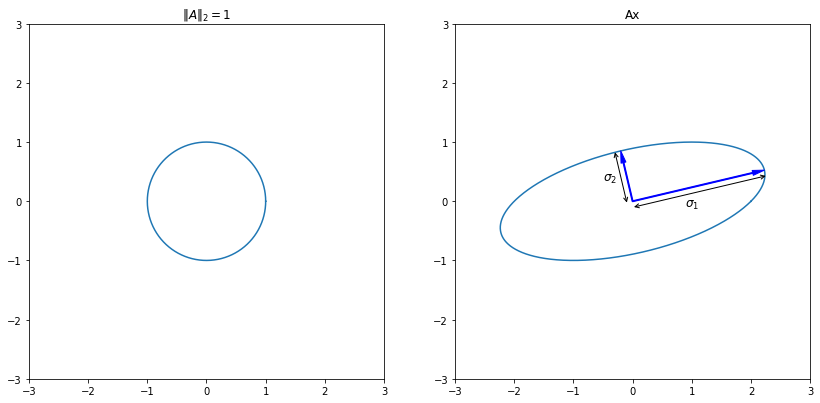

In [24]:
fig

## Półosie określają kierunki ortogonalne i wektory ortonormalne

Text(0.5, 1.0, 'Ax')

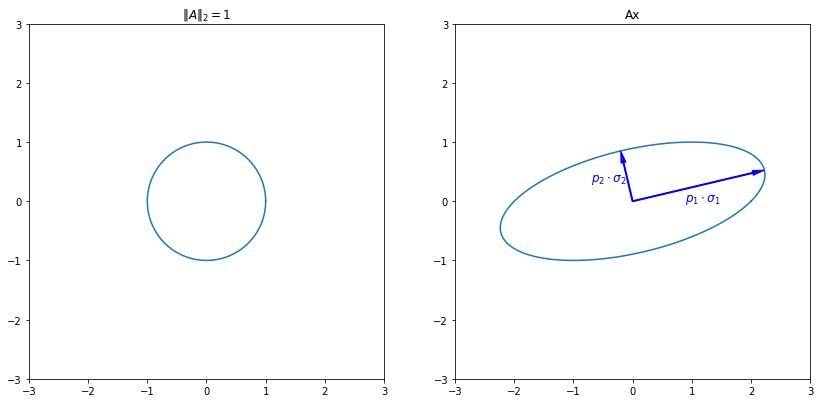

In [25]:
fig,axes=plt.subplots(1,2,figsize=(14,8))
ax1=axes[0]
ax1.plot(x[0,:],x[1,:])
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_aspect('equal')
ax1.set_title('$\Vert A \Vert_2=1$')

ax2=axes[1]
ax2.plot(y[0,:],y[1,:])
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_aspect('equal')
p1s1=(S[0]*P[0,0],S[0]*P[1,0])
p2s2=(S[1]*P[0,1],S[1]*P[1,1])
ax2.annotate('',xytext=(0,0),xy=p1s1,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.text(p1s1[0]*0.4,0,'$p_1\cdot\sigma_1$',c='blue',fontsize=12)
ax2.annotate('',xytext=(0,0),xy=p2s2,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.text(-.7,p2s2[1]*0.4,'$p_2\cdot\\sigma_2$',c='blue',fontsize=12)
ax2.set_title('Ax')


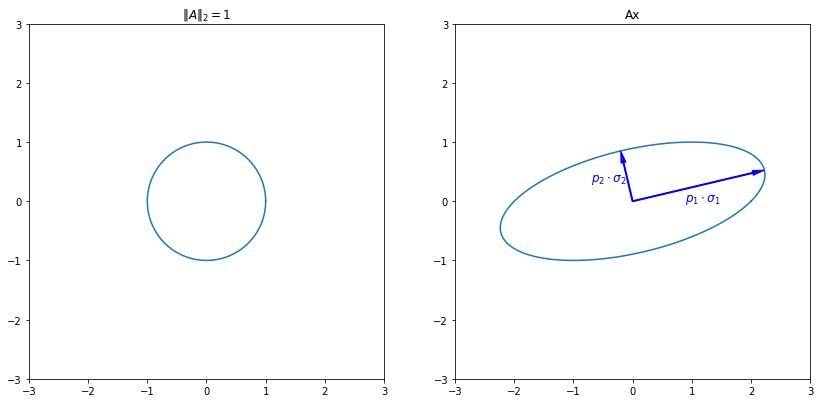

In [26]:
fig

## Wektory ortogonalne powstają z innych wektorów ortogonalnych

Text(-0.7, 0.3402603233408159, '$p_2\\cdot\\sigma_2$')

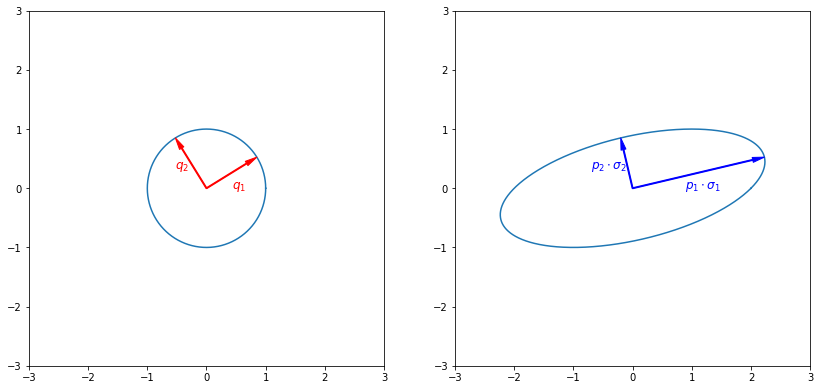

In [27]:
q1=tuple(Q[:,0])
q2=tuple(Q[:,1])


fig,axes=plt.subplots(1,2,figsize=(14,8))
ax1=axes[0]
ax1.plot(x[0,:],x[1,:])
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_aspect('equal')

ax1.annotate('',xytext=(0,0),xy=q1,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='red'))
ax1.text(q1[0]/2,0,'$q_1$',c='red',fontsize=12)

ax1.annotate('',xytext=(0,0),xy=(Q[0,1],Q[1,1]),arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='red'))
ax1.text(q2[0],q2[1]*.4,'$q_2$',c='red',fontsize=12)


ax2=axes[1]
ax2.plot(y[0,:],y[1,:])
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_aspect('equal')
p1s1=(S[0]*P[0,0],S[0]*P[1,0])
p2s2=(S[1]*P[0,1],S[1]*P[1,1])
ax2.annotate('',xytext=(0,0),xy=p1s1,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.text(p1s1[0]*0.4,0,'$p_1\cdot\sigma_1$',c='blue',fontsize=12)
ax2.annotate('',xytext=(0,0),xy=p2s2,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.text(-.7,p2s2[1]*0.4,'$p_2\cdot\\sigma_2$',c='blue',fontsize=12)


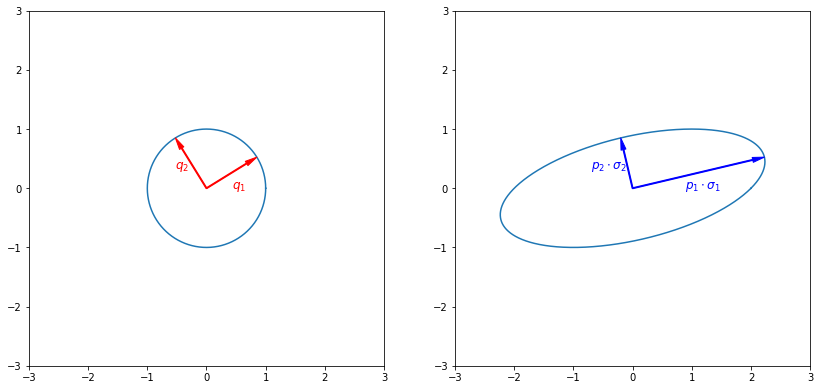

In [28]:
fig

## SVD - Rozkład na wartości singularne
Interpretacja macierzowa

$$
\left[
\begin{array}{ccccc}
&&&& \\ 
&&&& \\ 
&&A&& \\ 
&&&& \\ 
&&&&
\end{array}\right]
\left[
\begin{array}{c|c|c|c}
&&& \\
q_1 & q_2 &\dots& q_n  \\
&&&
\end{array}
\right]
=
\left[
\begin{array}{c|c|c|c}
&&& \\
&&& \\
p_1 & p_2 &\dots& p_n  \\
&&& \\
&&&
\end{array}
\right]
\begin{bmatrix}
\sigma_1&&&\\
&\sigma_2&&\\
&&\ddots&\\
&&&\sigma_n
\end{bmatrix}
$$
Lub skrótowo
$$
AQ=P\Sigma
$$

## Macierze $P$ i $Q$ są unitarne

Stąd mamy
$$
A=P\Sigma Q^*
$$

## Wartości singularne to nieujemne uporządkowane liczby rzeczywiste

$$\Sigma = \begin{bmatrix}
\sigma_1&&&\\
&\sigma_2&&\\
&&\ddots&\\
&&&\sigma_n
\end{bmatrix}
$$

## Ważne cechy

- Rozkład na wartości singularne zachodzi dla każdej macierzy
- Rząd macierzy to liczba niezerowych wartości singularnych
- Wyznacznik macierzy kwadratowej jest iloczynem wartości singularnych
- Wartości singularne macierzy odwrotnej są odwrotnościami wartości singularnych
- Nie istnieją w ogólnym przypadku wzory analityczne na wartości singularne, ale zachodzi

$$\{\sigma_i\}=\lambda(A^*A)$$

## Norma spektralna
Norma macierzy indukowana przez normę euklidesową to tzw. Norma spektralna i jest dana wzorem
$$
\Vert A\Vert_2 = \sigma_1
$$

Normę Frobeniusa też można wyrazić przez wartości singularne

$$
\Vert A\Vert_F = \sqrt{\sigma_1^2+\sigma_2^2+\ldots+\sigma_n^2}
$$

## Przykład zastosowania - kompresja obrazu

Idea jest następująca:

- Każdy obraz można przedstawić jako macierz intensywności kolorów (w odcieniach szarości łatwiej)
- Dla macierzy można zastosować SVD
- Jeżeli wartości singularne są malejące, to od pewnego momentu można je zastąpić zerami.
- Wtedy można zastąpić też odpowiadające im wektory z $P$ i $Q$ zerami, czyli mniej pamięci.
- Wymiary się nie zmienią.

Kod inspirowany artykułem [Jupyter, python, Image compression and svd — An interactive exploration](https://medium.com/@rameshputalapattu/jupyter-python-image-compression-and-svd-an-interactive-exploration-703c953e44f6) z Medium autorstwa Ramesh Putalapattu.


In [29]:
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "camera":data.camera(),
        "coin": data.coins(),
        "clock":data.clock(),
        "blobs":data.binary_blobs(),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

In [30]:
from numpy.linalg import svd

def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns 
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s 

In [31]:
def compress_show_gray_images(img_name,k):
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,3,figsize=(15,5))
    axes[0].plot(s)
    axes[0].plot(k,s[k],linestyle='none',marker='o',color='red')
    axes[0].text(k,0.25*(np.max(s)-np.min(s)),'$\sigma_k$={:.2f}'.format(s[k]),color='red',fontsize=12)
    axes[0].set_title('Singular values')

    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    axes[2].set_title("Original image")
    axes[2].imshow(image,cmap='gray')
    axes[2].axis('off')
    fig.tight_layout()

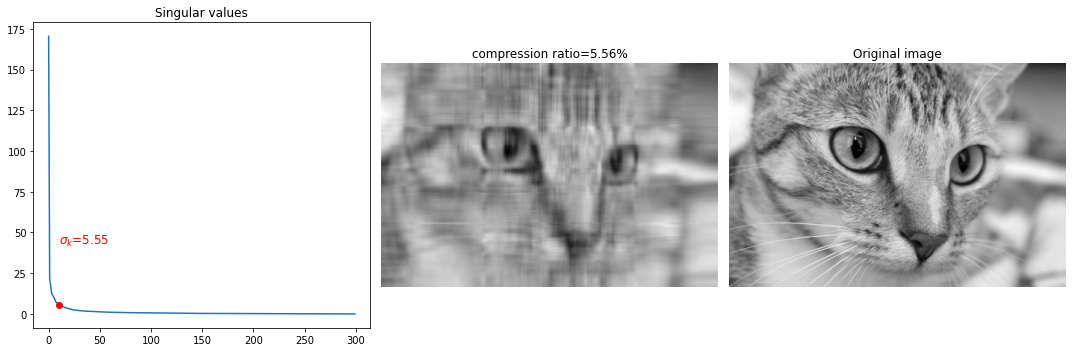

In [49]:
compress_show_gray_images("cat",10)

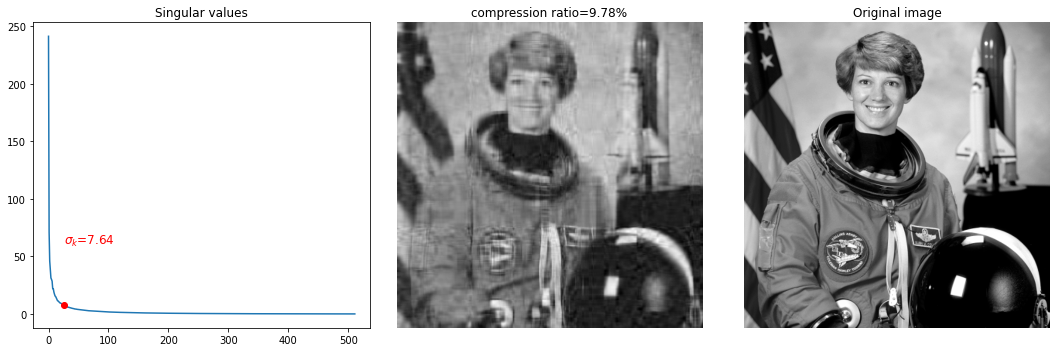

In [50]:
compress_show_gray_images("astro",25)

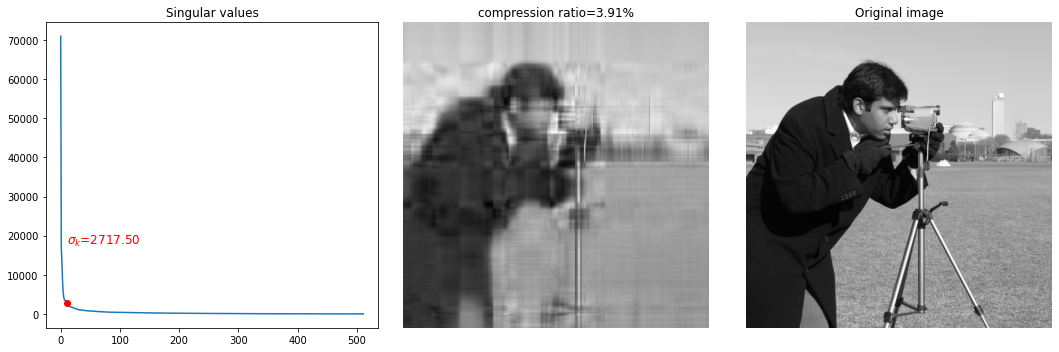

In [52]:
compress_show_gray_images("camera",10)

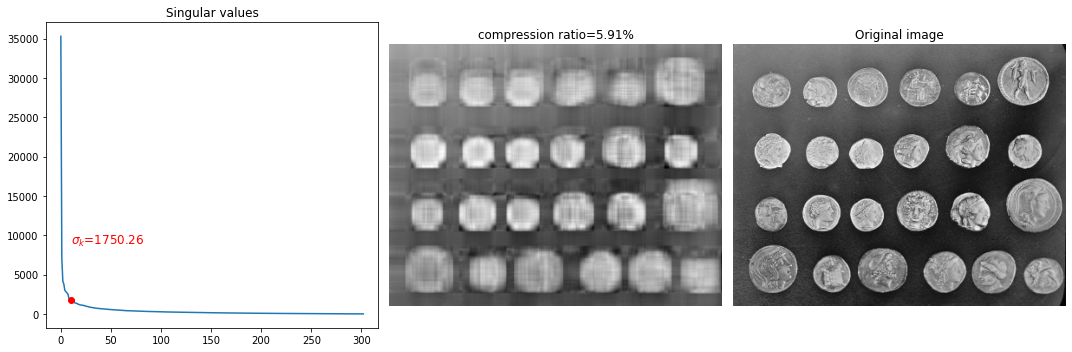

In [58]:
compress_show_gray_images("coin",10)

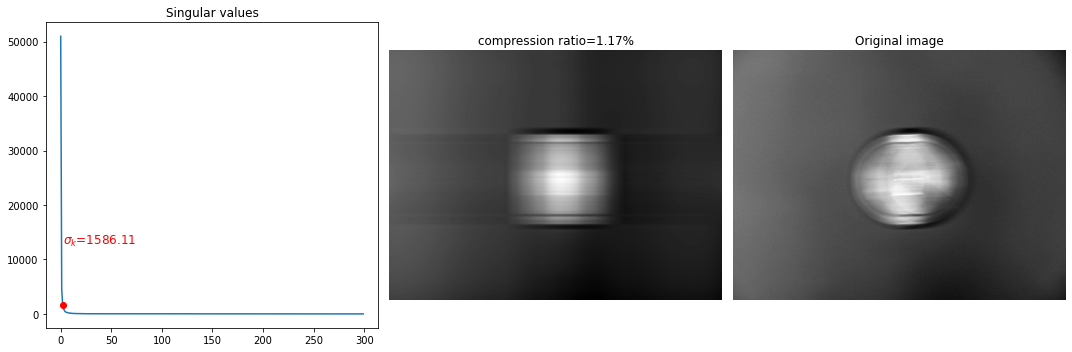

In [62]:
compress_show_gray_images("clock",2)

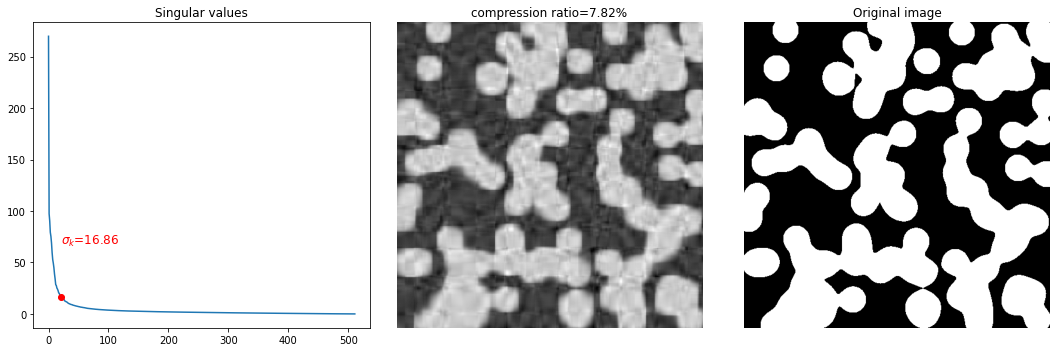

In [37]:
compress_show_gray_images("blobs",20)

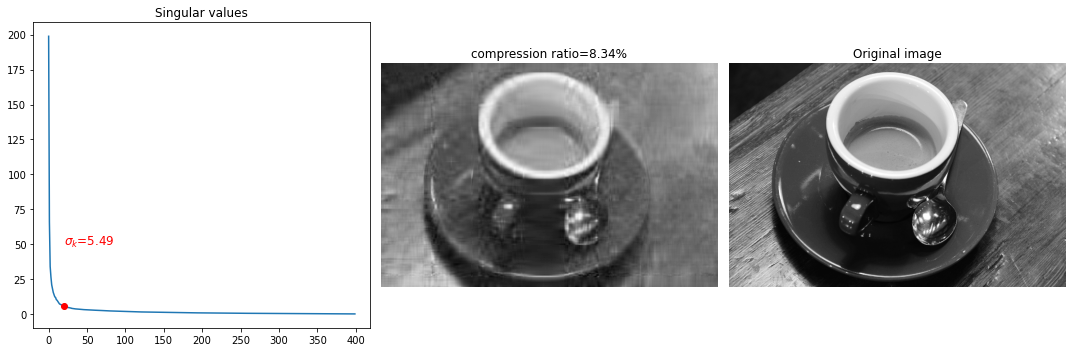

In [38]:
compress_show_gray_images("coffee",20)

## Podsumowanie

- Czy to się stosuje? Nie
- Dlaczego? To dość niewydajna kompresja